<a href="https://colab.research.google.com/github/manudsanun/python_dataviz2024/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IMDb Movies India.csv', encoding='latin')
df

In [ ]:
# ลบข้อมูลที่มี NAN ออกจากตาราง
df1 = df.dropna(subset='Director')
df1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN


In [ ]:
# นับจำนวนผู้กำกับในคอลัมน์ Director
num_directors = df1['Director'].nunique()
# แสดงจำนวนผู้กำกับ
print(f'จำนวนผู้กำกับในคอลัมน์ Director: {num_directors}')

จำนวนผู้กำกับในคอลัมน์ Director: 5938


In [ ]:
#หาว่าผู้กำกับแต่ละคนทั้ง 5938 คน สร้างหนังคนละกี่เรื่อง
director_counts = df1['Director'].value_counts()
director_counts

,count
Director,
Jayant Desai,58
Kanti Shah,57
Babubhai Mistry,50
Mahesh Bhatt,48
Master Bhagwan,47
...,...
Naeem Siddiqui,1
Shadaab Khan,1
Mystelle Brabbee,1


In [ ]:
# จัดกลุ่มผู้กำกับที่สร้างหนังจำนวนเท่ากันให้อยู่กลุ่มเดียวกัน
director_groups = director_counts.groupby(director_counts).count()
director_groups

,count
count,
1,3896
2,808
3,379
4,179
5,137
6,103
7,76
8,51
9,33


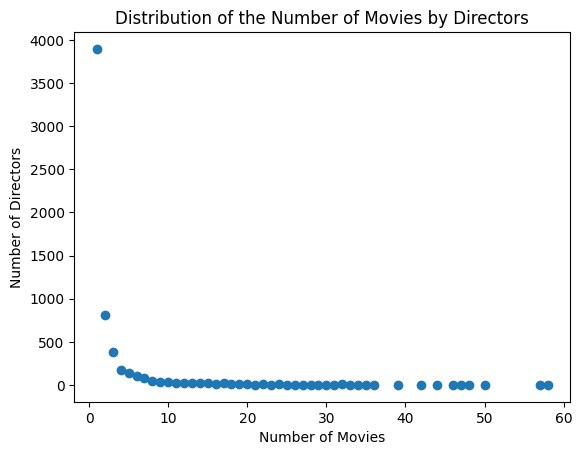

In [ ]:
# สร้างกราฟการกระจายข้อมูล
plt.scatter(director_groups.index, director_groups.values)
plt.xlabel('Number of Movies')
plt.ylabel('Number of Directors')
plt.title('Distribution of the Number of Movies by Directors')
plt.show()

จากกราฟแสดงให้เห็นว่า จำนวนหนังที่กำกับมากขึ้น จำนวนผู้กำกับจะมีแนวโน้มลดลง และจุดของข้อมูลมีแนวโน้มลดลงอย่างรวดเร็วในช่วงแรก แล้วค่อยๆลดลงอย่างช้าๆ และ มีจุดข้อมูลบางจุดที่อยู่ห่างจากกลุ่มอื่นๆ ซึ่งอาจเป็นผู้กำกับที่กำกับหนังจำนวนมากผิดปกติ

ผู้กำกับส่วนใหญ่มักกำกับภาพยนตร์เพียงไม่กี่เรื่อง ขณะที่มีผู้กำกับเพียงจำนวนน้อยที่กำกับภาพยนตร์จำนวนมาก ซึ่งอาจบ่งบอกถึงความแตกต่างในด้านประสบการณ์ ความสำเร็จ หรือโอกาสในอุตสาหกรรมภาพยนตร์

# plot แสดงการกระจายของข้อมูลภาพยนตร์ที่ถูกผลิตออกมาตั้งแต่ปี 1913 - 2022


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Dataviz_2024_DATA/IMDb Movies India.csv'
India_Imdb = pd.read_csv(file_path, encoding='latin-1') # ลบอักขระพิเศษออก
India_Imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# Data Cleansing
# Drop ค่า Nan ออกจากตาราง Year และ
Movie_India_Imdb = India_Imdb.dropna(subset=['Year'])
Movie_India_Imdb.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [ ]:
# แปลง column Year ให้เป็นตัวเลข
# การแปลงค่าภายในคอลัมน์ Year ให้เป็นชนิดข้อมูลแบบสตริง (หรือข้อความ) ก่อนทำการประมวลผลอื่น ๆ
Movie_India_Imdb['Year'] = Movie_India_Imdb['Year'].astype(str).str.replace(r'[^0-9]', '', regex=True)
Movie_India_Imdb['Year'] = Movie_India_Imdb['Year'].astype(int)
Movie_India_Imdb.head()


<ipython-input-158-13c1c2d8c927>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_India_Imdb['Year'] = Movie_India_Imdb['Year'].astype(str).str.replace(r'[^0-9]', '', regex=True)
<ipython-input-158-13c1c2d8c927>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_India_Imdb['Year'] = Movie_India_Imdb['Year'].astype(int)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [ ]:
# สร้าง DataFrame ใหม่ที่จัดกลุ่มจำนวนหนังที่ออกฉายในแต่ละปี
Movies_per_year = Movie_India_Imdb.groupby('Year').size().reset_index(name='Movie_count')
Movies_per_year

,Year,Movie_count
0,1913,1
1,1914,1
2,1915,1
3,1917,1
4,1922,1
...,...,...
97,2018,381
98,2019,410
99,2020,320
100,2021,392


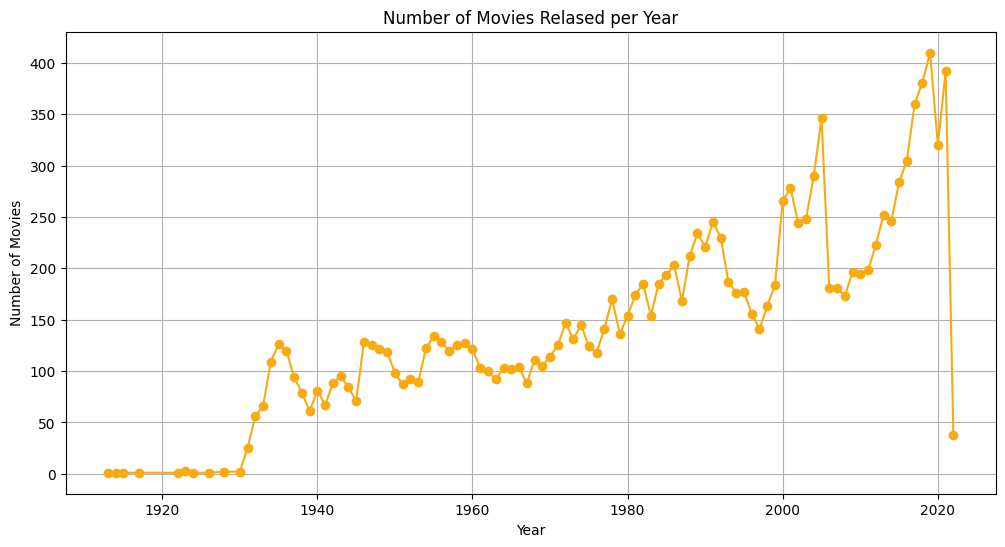

In [ ]:
# สร้างกราฟ Line chart
plt.figure(figsize=(12, 6)) # กำหนดขนาดของกราฟ
plt.plot(Movies_per_year['Year'], Movies_per_year['Movie_count'], marker='o', linestyle='-', color = '#f8ab11')
plt.title('Number of Movies Relased per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()